<a href="https://colab.research.google.com/github/Amrod92/machine_learning/blob/master/Zalando_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
##### Tensorflow tutorial - Basic image classification

from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

#print the tensorflow version
print(tf.__version__)

1.15.0


In [0]:
###################   Import the Fashion MNIST dataset   ###################

#importing Zalando fashion_mnist dataset
fashion_mnist = keras.datasets.fashion_mnist

#loading the dataset and returns an NumPy array of train_images and train_labels. It later tested against the test set test_images and test_labels arrays
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
##since the classification is made by number 0 to 9 we need to label these numbers to name
#0	T-shirt/top
#1	Trouser
#2	Pullover
#3	Dress
#4	Coat
#5	Sandal
#6	Shirt
#7	Sneaker
#8	Bag
#9	Ankle boot

class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [4]:
##################   Explore the data   #####################

#we are now going to explore the data
#the next line would tell the following (how_many_images, how_many_pixel, how_many_pixel)
print("this is how many images containes the database, and each image is rappresented as 28x28 pixels: ")
print (train_images.shape)
#the following line return how many images has been labeled...should return 60,000
len(train_labels)
#each label is an integer between 0 and 9
train_labels
#here it tells how many images there are inside the test set - 10,000 as 28x28
test_images.shape
#the test contains 10,000 images
len(test_labels)

this is how many images containes the database, and each image is rappresented as 28x28 pixels: 
(60000, 28, 28)


10000

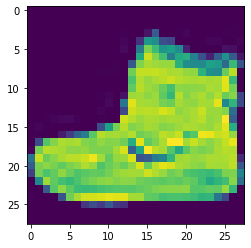

In [5]:
################   Preprocess the data   #####################

#The data must be preprocessed before training the network
#Analasing the first image in the training set we can see the pixel values fall in the range of 0 to 255
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.show()

In [0]:
#Scale these values to a range of 0 to 1 before feeding them to the neural network model.
#To do so, we should devide the values by 255. Both training set and testing sets be preprocessed in the same way.
train_images = train_images / 255.0
test_images = test_images / 255.0

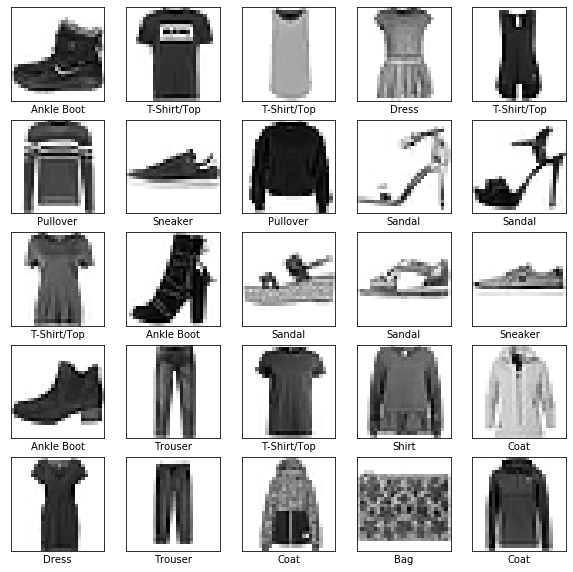

In [7]:
#To verify that the data is in the correct format and be ready to build and train the neural network
#Let's display the first 25 images from the training set and display the class name below
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
#######  Build the model
#Building the neural network requires configuring the layers of the model, then compiling the model
####Set up the layers
#The layer are the building blocks of a neural network. Layers extract representations from the data fed into them. 
#Most of the deep learning consists of chaining togheter simple layers, some others, have parameters that are learned during training.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),#Tansforms the format of the images from a two-dimensional array(28 by 28 pixels) to a one-dimensional array(28*28=784) - this layer has no paramenters to learn; only reformats the data.
    #Ater the pixel flattened, the network consists of a sequence of two tf.keras.layers.Dense layers.
    #These are densely connected, or fully connected, neural layers.
    keras.layers.Dense(128, activation='relu'), #The first Dense layer has 128 nodes(or neurons).
    keras.layers.Dense(10, activation='softmax') #The second layer is a 10 node softmax layer that returns an array of 10 probability scores that sum to 1.
    #Each node containes a score that indicatres the probability that the current image belong to one of the 10 classes.
])
#Before the model is ready for training, it needs few more settings. These are added during the model's compile step
#   -Loss function: This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
#   -Optimizer: This is how the model is updated based on the data it sees and its loss function.
#   -Metrics: Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [9]:
#######   Train the model
#Training the neural network model requires the following steps:
#   1- Feed the training data to the model. In our example the training data is in the train_images and train_labels arrays.
#   2- The model learns to associate images and labels.
#   3- We ask the model to make predictions about a test set-in this example, the test_images arrayss. Verify that the predictions match the labels from the test_labels array.
#To start training the method model.fit is call.
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/sample - loss: 0.4970 - acc: 0.8242
Epoch 2/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3748 - acc: 0.8636
Epoch 3/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3374 - acc: 0.8762
Epoch 4/10
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3125 - acc: 0.8845
Epoch 5/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2957 - acc: 0.8910
Epoch 6/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2820 - acc: 0.8958
Epoch 7/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2709 - acc: 0.9001
Epoch 8/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2598 - acc: 0.9036
Epoch 9/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.2487 - acc: 0.9070
Epoch 10/10
60000/60000 [==============================] - 

In [10]:
##### Evaluate accuracy
#Compare how the model performs on the test dataset:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3382 - acc: 0.8833

Test accuracy: 0.8833


In [11]:
#With the model trained, you can use it to make predictions about some images.
predictions = model.predict(test_images)
#The model has predicted the images on the "test_images" set.
#The following is the first image test prediction.
predictions[0]
#A prediction is an array of 10 numbers, and they rappresent the model's "confidence" that the image corresponds to each of the different articles of clothing.

array([5.6569958e-09, 1.7662365e-10, 4.3774907e-11, 9.4881100e-14,
       7.2875084e-10, 5.0010241e-04, 5.2718843e-09, 1.2728037e-02,
       4.9126193e-11, 9.8677188e-01], dtype=float32)

In [12]:
#We can see wwhich label has the highest confidence value:
np.argmax(predictions[0])

9

In [13]:
#The model is most confident that this image is an ankle boot, or class_names[9]:
test_labels[0]

9

In [0]:
#Graph this to look at the full set of 10 class predictions.
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

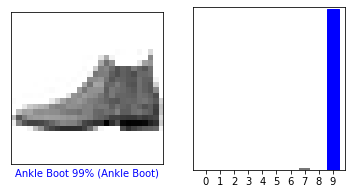

In [15]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

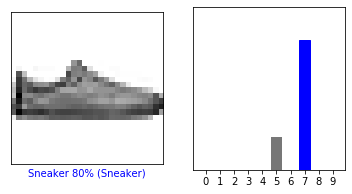

In [16]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

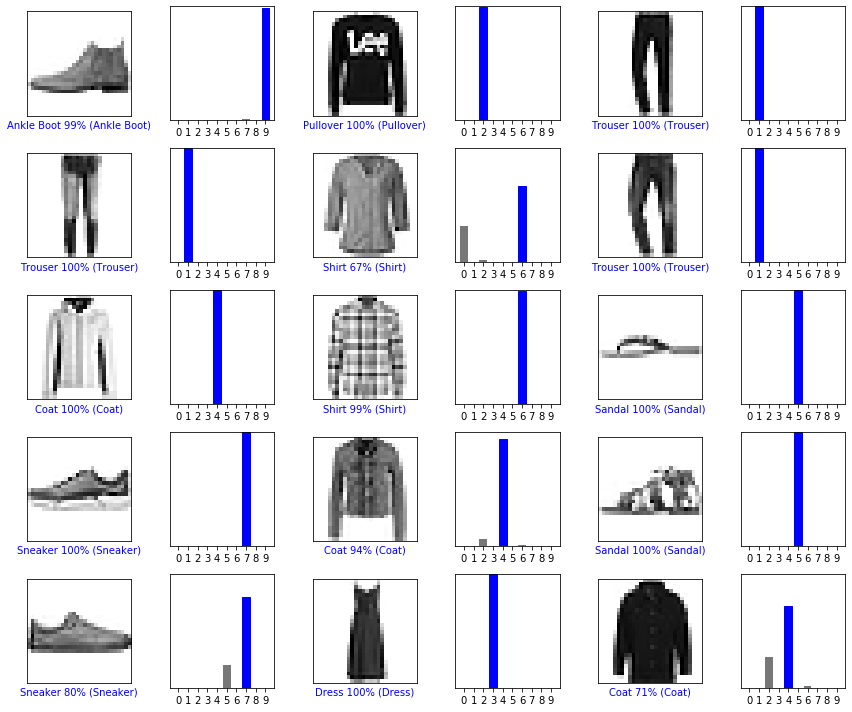

In [17]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [18]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [19]:
#The tf.keras models are optimized to make predictions on a batch, or collection, of examples at once.
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [20]:
#Prediction of the correct label
#The model.predict returns a list of lists—one list for each image in the batch of data.
predictions_single = model.predict(img)

print(predictions_single)

[[1.3763444e-04 2.3828087e-10 9.9568993e-01 1.7991188e-10 3.9358218e-03
  8.3573287e-12 2.3653891e-04 1.2893254e-22 2.6561995e-09 1.8131316e-11]]


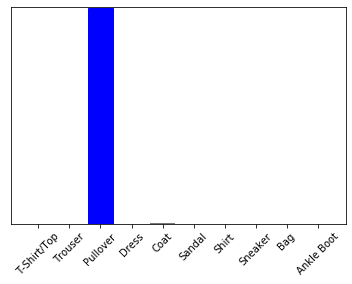

In [21]:
#Let's plot it
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [22]:
#This is the prediction for our image in the batch.
#The output is 2 = Pullover
i = np.argmax(predictions_single[0])
print(i)
print(class_names[i])

2
Pullover
